In [1]:
# Import the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_df = pd.read_csv('train (1).csv')  
test_df = pd.read_csv('test (1).csv')

In [3]:
#Peek at the data 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Работа с категориальными признаками

In [4]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare'] 
train_df.drop(cont_features, axis=1, inplace=True) 
train_df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [6]:
train_df.groupby(train_df['Cabin'].isnull()).mean() # True-отсутствие упоминаний о каюте

C:\Users\Ирина\AppData\Local\Temp\ipykernel_15856\2042657220.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(train_df['Cabin'].isnull()).mean()


,Survived
Cabin,
False,0.666667
True,0.299854


In [7]:
train_df['Cabin_indicator'] = np.where(train_df['Cabin'].isnull(), 0, 1) 
train_df.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 640x480 with 0 Axes>

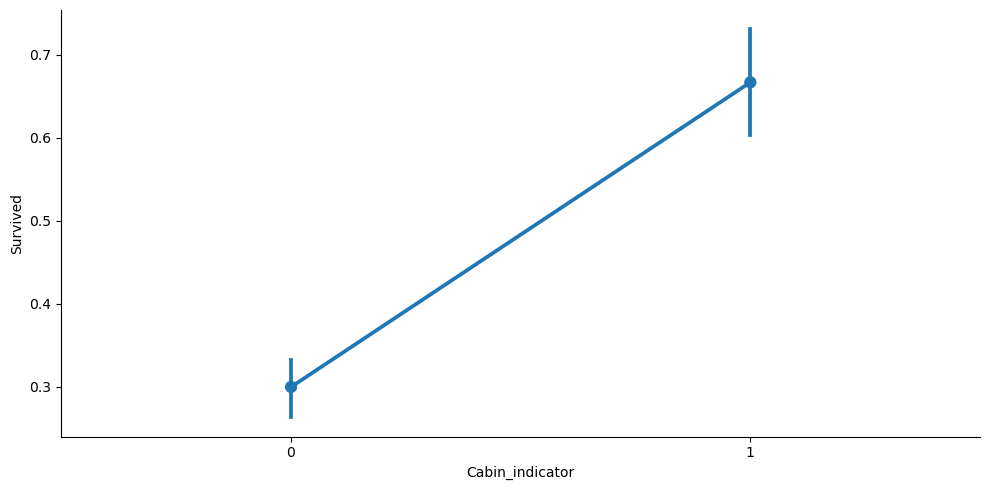

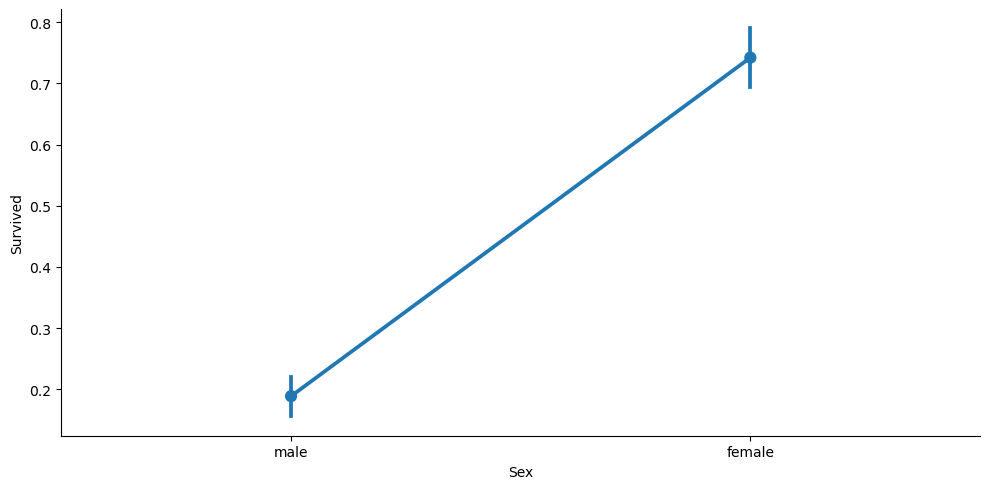

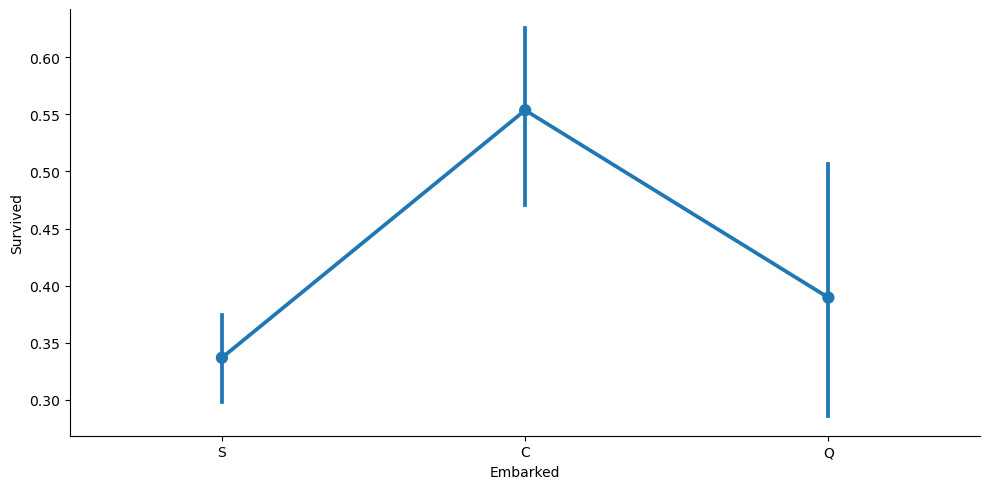

In [8]:
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):   
    plt.figure(i)   
    sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2,)

In [9]:
train_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [10]:
train_df.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [11]:
train_df.drop(['Ticket'], axis=1, inplace=True) 
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [12]:
binary_gender = {'male': 0, 'female': 1} 
train_df['Sex'] = train_df['Sex'].map(binary_gender)

In [13]:
train_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [14]:
train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True) 
train_df.head()

,Survived,Sex,Cabin_indicator
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
